In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [3]:
# dataset refers to advertising cost in dollars through different means.peobelm is to predict future sales.

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# visualize

<Axes: xlabel='Sales', ylabel='TV'>

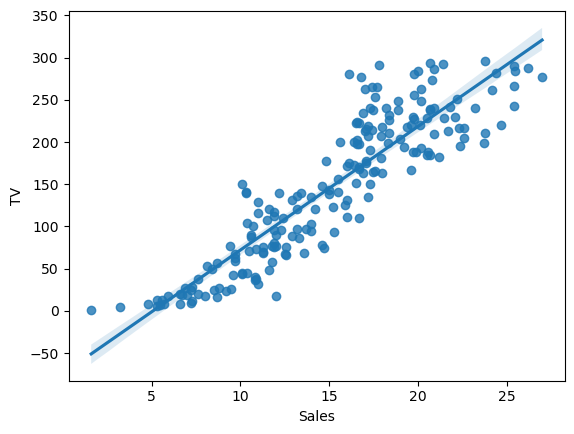

In [32]:
sns.regplot(x='Sales',y='TV',data=df,scatter=True,fit_reg=True)


<Axes: xlabel='Sales', ylabel='Radio'>

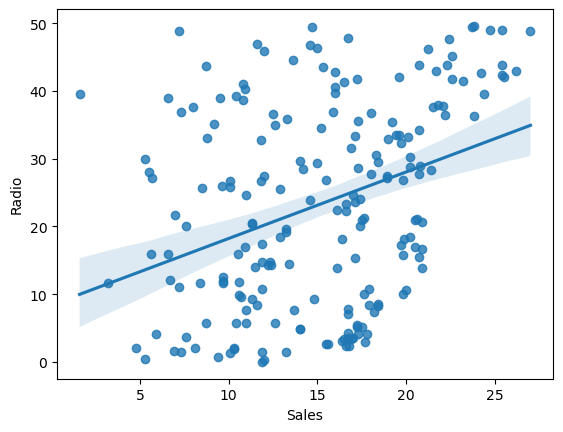

In [33]:
sns.regplot(x='Sales',y='Radio',data=df,scatter=True,fit_reg=True)

<Axes: xlabel='Sales', ylabel='Newspaper'>

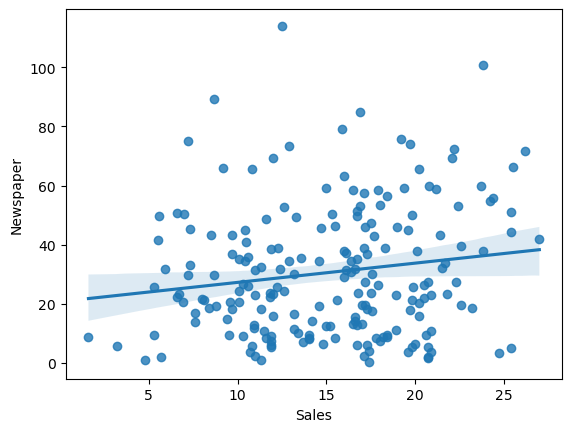

In [34]:
sns.regplot(x='Sales',y='Newspaper',data=df,scatter=True,fit_reg=True)

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

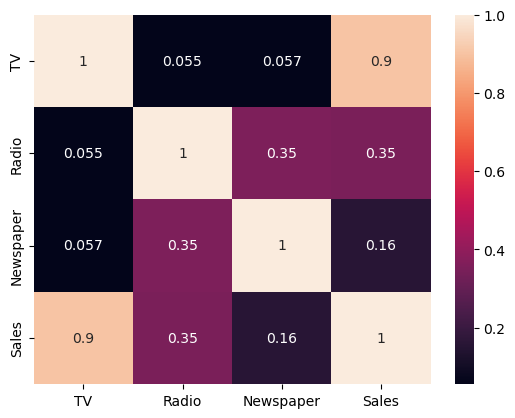

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

# Modelling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
lr=LinearRegression()
r=Ridge()
l=Lasso()
e=ElasticNet()

In [10]:
x=df.drop('Sales',axis=1)
y=df['Sales']


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(pred,y_test),',',mean_squared_error(pred,y_test),',',mean_absolute_error(pred,y_test))

0.8960265274962571 , 2.9077569102710896 , 1.2748262109549338


In [12]:
r.fit(x_train,y_train)
pred2=r.predict(x_test)
print(r2_score(pred2,y_test),',',mean_squared_error(pred2,y_test),',',mean_absolute_error(pred2,y_test))

0.8960245865469743 , 2.907796107367048 , 1.2748301536195634


In [13]:
l.fit(x_train,y_train)
pred3=l.predict(x_test)
print(r2_score(pred3,y_test),',',mean_squared_error(pred3,y_test),',',mean_absolute_error(pred3,y_test))

0.8937419494023555 , 2.9289106762499757 , 1.2725851163834117


In [14]:
e.fit(x_train,y_train)
pred4=e.predict(x_test)
print(r2_score(pred4,y_test),',',mean_squared_error(pred4,y_test),',',mean_absolute_error(pred4,y_test))

0.8947807489975056 , 2.9201022575551407 , 1.272709971809027


In [16]:
#input and check the model
features=np.array([[230.1, 37.8, 69.2]])
lr.predict(features)

array([21.37254028])